# Text data
- hyperparameter tuning

#### Example: Combination of `C` and `gamma` parameter in SVC - finding the best one

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), params, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9736842105263158
{'C': 1, 'gamma': 0.1}
0.9732142857142857
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000800,0.001600,0.0000,0.000000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
1,0.001600,0.001959,0.0000,0.000000,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
2,0.000800,0.001600,0.0016,0.001960,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
3,0.000801,0.001602,0.0016,0.001959,0.001,1,"{'C': 0.001, 'gamma': 1}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
4,0.000000,0.000000,0.0000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367


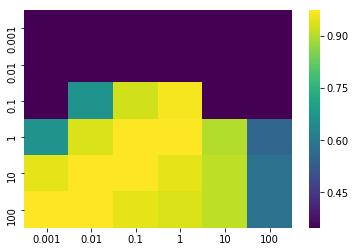

In [19]:
sns.heatmap(np.array(results.mean_test_score).reshape(6,6), cmap="viridis", xticklabels=params['gamma'], yticklabels=params['C'])

In [20]:
params = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), params, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9736842105263158
{'C': 1, 'kernel': 'rbf'}
0.9821428571428571
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearch in combination with SVC

- 36\*5\*5 = 900 models are being built

In [40]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y)
svc = SVC().fit(X_train, y_train)
from sklearn.metrics import average_precision_score
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of svc: {:.3f}".format(ap_svc))

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Average precision of svc: 0.875


In [59]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import cross_val_score
scores = cross_val_score(GridSearchCV(SVC(), params, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

scores = cross_val_score(GridSearchCV(SVC(), params, cv=5),
iris.data, iris.target == 0, cv=5, scoring="roc_auc")
print("Cross-validation scores [roc_auc]: ", scores)
print("Mean cross-validation score [roc_auc]: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001
Cross-validation scores [roc_auc]:  [1. 1. 1. 1. 1.]
Mean cross-validation score [roc_auc]:  1.0


Note the use of `scoring="roc_auc"`
- for classification: roc_auc, f1, f1_macro, f1_micro, and f1_weighted
- for regression - r2, mean_squared_error

## Metrics
- keep the end goal in mind - business metric - predictions are used as part of a larger decision making proces
    - consequence: pick a model parameter that have the most positive influence on the business metrics
- **accuracy** is often not a good measure of predictive performance, it doesn't contain all the information we're interested in 
    - e.g. cancer detection: **false positive (type I error)** leads to additional test, **false negative (type II error)** may lead to death


#### Uncertainty
Calibration: a calibrated model is a model that provides an accurate
measure of its uncertainty.

### Binary classification
Datasets are often not balanced, class imbalances need to be consider too
- e.g. 90% accuracy might be just a model predicting one class

Use:
- confusion matrix: `from sklearn.metrics import confusion_matrix(y_test, preds)`
- **precision** = PPV - how many predicted positives are actually positive. Goal: Limit the number of false negatives
- **recall** = TPR - how many positive samples are captured by the positive predictions. Goal: Identify all positive samples

There is a tradeoff in optimizing for precision and for recall. You can easily obtain 100\% recall if predicting all the samples as positive, but the number of false-positives will be too high, so precision will be low.

#### Difference in Confusion matrix in  DummyClassifier vs. DecitionTree
- from the confusion matrix: most-frequent will predict the same class

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [47]:
from sklearn.metrics import confusion_matrix
dummy_majority_pred = dummy_majority.predict(X_test)
pred_tree = tree.predict(X_test)

print(f"Confusion matrix [Dummy]: \n{confusion_matrix(y_test, dummy_majority_pred)}")
print(f"Confusion matrix [DecTree]: \n{confusion_matrix(y_test, pred_tree)}")

Confusion matrix [Dummy]: 
[[403   0]
 [ 47   0]]
Confusion matrix [DecTree]: 
[[390  13]
 [ 24  23]]


- **f-score** - a way to summarize both precision and recall.
    - better predictive measure than accuracy on imbalanced classification datasets
    - `from sklearn.metrics import f1_score`
    
- `sklearn.metrics import classification_report` - for summary of precision, recall and f-score

In [49]:
from sklearn.metrics import f1_score
print(f"f1_score [Dummy]: \n{f1_score(y_test, dummy_majority_pred)}")
print(f"f1_score [DecTree]: \n{f1_score(y_test, pred_tree)}")

f1_score [Dummy]: 
0.0
f1_score [DecTree]: 
0.5542168674698795


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
from sklearn.metrics import classification_report
print(f"classification_report [Dummy]: \n{classification_report(y_test, dummy_majority_pred)}")
print(f"classification_report [DecTree]: \n{classification_report(y_test, pred_tree)}")

classification_report [Dummy]: 
              precision    recall  f1-score   support

       False       0.90      1.00      0.94       403
        True       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

classification_report [DecTree]: 
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       403
        True       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Roc curves
Adjusting the threshold at which we make the prediction is a way of regulating the trade-off between precision and recall. It is oftentimes not clear what \% of recall vs. precision we want, that's why it's useful to visualize this relationship using a ROC curve.

ROC curves are therefore a useful measure when the classes are imbalanced

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.0, 1.0)

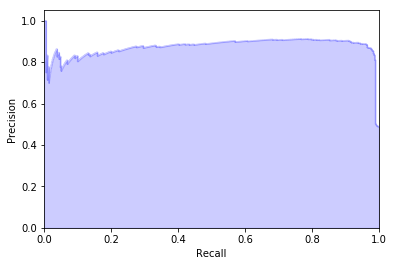

In [41]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
y_score = svc.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, recall, thresholds = precision_recall_curve(y_test, y_score)
plt.step(recall, prec, color='b', alpha=0.2, where='post')
plt.fill_between(recall, prec, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

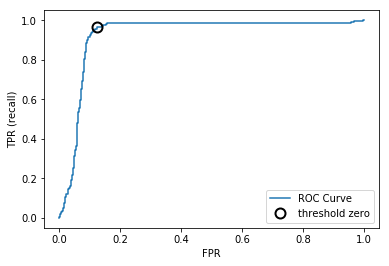

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00 accuracy = 0.92 AUC = 0.93
gamma = 0.05 accuracy = 0.91 AUC = 0.95
gamma = 0.01 accuracy = 0.92 AUC = 0.96


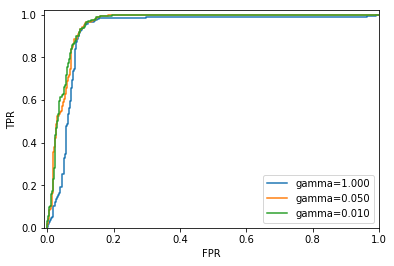

In [45]:
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

## Multi-class classification metrics


In [53]:
from sklearn.metrics import accuracy_score
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
tree = DecisionTreeClassifier().fit(X_train, y_train)
pred = tree.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.847
Confusion matrix:
[[33  0  1  0  0  0  1  0  0  2]
 [ 0 36  4  1  1  0  0  0  0  1]
 [ 1  1 33  2  1  0  1  0  4  1]
 [ 0  1  4 36  0  0  0  0  3  1]
 [ 1  1  0  0 33  0  0  1  1  1]
 [ 0  0  0  3  0 43  0  1  0  1]
 [ 0  0  0  0  0  0 50  0  1  1]
 [ 1  0  0  3  0  1  0 39  2  2]
 [ 0  2  1  5  1  0  0  0 39  0]
 [ 0  0  0  3  1  4  0  0  0 39]]


In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.88      0.84      0.86        43
           2       0.77      0.75      0.76        44
           3       0.68      0.80      0.73        45
           4       0.89      0.87      0.88        38
           5       0.90      0.90      0.90        48
           6       0.96      0.96      0.96        52
           7       0.95      0.81      0.88        48
           8       0.78      0.81      0.80        48
           9       0.80      0.83      0.81        47

   micro avg       0.85      0.85      0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



We can see that the difficulties arrive mainly with classes 3 and 8

In [60]:
print("Micro average f1 score: {:.3f}".format
(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.847
Macro average f1 score: 0.848
